In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd drive/My\ Drive/Datasets/titanic\ dataset

/content/drive/My Drive/Datasets/titanic dataset


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

In [4]:
# peek at sample submission
sample_df = pd.read_csv('./gender_submission.csv')
print(f'length of dataframe: {len(sample_df)}')
print(sample_df.head())
print(sample_df.info())

length of dataframe: 418
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.7 KB
None


In [5]:
# peek at training data
train_df = pd.read_csv('./train.csv')
print(f'length of dataframe: {len(train_df)}')
print(train_df.head())
print(train_df.info())

length of dataframe: 891
   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage

In [6]:
# peek at testing data
test_df = pd.read_csv('./test.csv')
print(f'length of dataframe: {len(test_df)}')
print(test_df.head())
print(test_df.info())

length of dataframe: 418
   PassengerId  Pclass  ... Cabin Embarked
0          892       3  ...   NaN        Q
1          893       3  ...   NaN        S
2          894       2  ...   NaN        Q
3          895       3  ...   NaN        S
4          896       3  ...   NaN        S

[5 rows x 11 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


<h1>Table Familiarisation</h1>

In [7]:
# data columns
column_labels = train_df.columns
print(f'The columns of train_df are {column_labels}')

The columns of train_df are Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [8]:
# Sex column
print(f'the unique elements in the \'Sex\' column are {pd.unique(train_df["Sex"])}')

the unique elements in the 'Sex' column are ['male' 'female']


In [9]:
# Ticket column
print(f'the number of unique elements in the \'Ticket\' column is {len(pd.unique(train_df["Ticket"]))}')
print(train_df[["Ticket"]].head(10))

the number of unique elements in the 'Ticket' column is 681
             Ticket
0         A/5 21171
1          PC 17599
2  STON/O2. 3101282
3            113803
4            373450
5            330877
6             17463
7            349909
8            347742
9            237736


In [10]:
# Embarked column
print(f'the number of unique elements in the \'Embarked\' column is {len(pd.unique(train_df["Embarked"]))}')
print(train_df[["Embarked"]].head(10))

the number of unique elements in the 'Embarked' column is 4
  Embarked
0        S
1        C
2        S
3        S
4        S
5        Q
6        S
7        S
8        S
9        C


In [11]:
# Numerical columns
numerical_only_df = train_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
numerical_only_df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


<h1> Data Processing </h1>

1. drop 'Name', 'PassengerId' and 'Cabin' column
2. fill 'Age' column with mean value
3. drop invalid rows of 'Embarked' 
4. convert 'Sex' and 'Embarked' columns into numerical data
5. obtain first digit in numerical part of 'Ticket' and drop none numerical data

In [12]:
# copy df
lgr_df = train_df.copy(deep=True)

# 1
lgr_df = lgr_df.drop('Name', 1).drop('PassengerId', 1).drop('Cabin', 1)

# 3
lgr_df = lgr_df[lgr_df['Embarked'].notnull()]

# 4
sex = lgr_df['Sex'].values
sex_encoder = sklearn.preprocessing.LabelEncoder()
sex = sex_encoder.fit_transform(sex)
lgr_df['Sex'] = sex

embarked = lgr_df['Embarked'].values
embarked_encoder = sklearn.preprocessing.LabelEncoder()
embarked = embarked_encoder.fit_transform(embarked)
lgr_df['Embarked'] = embarked

# 5
lgr_df['Ticket'] = lgr_df['Ticket'].apply(lambda x:x.split()[-1])
lgr_df = lgr_df[lgr_df['Ticket'].str.isnumeric()]
lgr_df['Ticket'] = lgr_df['Ticket'].apply(lambda x:int(x))

# peek at new df
print(lgr_df.head())
print(lgr_df.info())

   Survived  Pclass  Sex   Age  SibSp  Parch   Ticket     Fare  Embarked
0         0       3    1  22.0      1      0    21171   7.2500         2
1         1       1    0  38.0      1      0    17599  71.2833         0
2         1       3    0  26.0      0      0  3101282   7.9250         2
3         1       1    0  35.0      1      0   113803  53.1000         2
4         0       3    1  35.0      0      0   373450   8.0500         2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 885 entries, 0 to 890
Data columns (total 9 columns):
Survived    885 non-null int64
Pclass      885 non-null int64
Sex         885 non-null int64
Age         708 non-null float64
SibSp       885 non-null int64
Parch       885 non-null int64
Ticket      885 non-null int64
Fare        885 non-null float64
Embarked    885 non-null int64
dtypes: float64(2), int64(7)
memory usage: 69.1 KB
None


In [13]:
# labels for independent and dependent variables
y_label = 'Survived'
x_labels = [label for label in lgr_df.columns if label != y_label]
print(f'label of the dependent variable is {y_label}')
print(f'labels of the independent variables are {x_labels}')

label of the dependent variable is Survived
labels of the independent variables are ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']


In [14]:
# independent and dependent variables
x = lgr_df[x_labels].to_numpy()
y = lgr_df[y_label].to_numpy()
print(x[:5])
print(y[:5])

[[3.000000e+00 1.000000e+00 2.200000e+01 1.000000e+00 0.000000e+00
  2.117100e+04 7.250000e+00 2.000000e+00]
 [1.000000e+00 0.000000e+00 3.800000e+01 1.000000e+00 0.000000e+00
  1.759900e+04 7.128330e+01 0.000000e+00]
 [3.000000e+00 0.000000e+00 2.600000e+01 0.000000e+00 0.000000e+00
  3.101282e+06 7.925000e+00 2.000000e+00]
 [1.000000e+00 0.000000e+00 3.500000e+01 1.000000e+00 0.000000e+00
  1.138030e+05 5.310000e+01 2.000000e+00]
 [3.000000e+00 1.000000e+00 3.500000e+01 0.000000e+00 0.000000e+00
  3.734500e+05 8.050000e+00 2.000000e+00]]
[0 1 1 1 0]


In [15]:
# standardise model
standardiser = sklearn.preprocessing.StandardScaler()
x = standardiser.fit_transform(x)
x = np.nan_to_num(x, nan=0)
print(x[:5])

[[ 0.82834714  0.73790421 -0.5261397   0.42845448 -0.47563846 -0.42189319
  -0.50250163  0.58862255]
 [-1.56736273 -1.35518946  0.57754972  0.42845448 -0.47563846 -0.42732237
   0.78499672 -1.93404553]
 [ 0.82834714 -1.35518946 -0.25021734 -0.476515   -0.47563846  4.25964557
  -0.48892961  0.58862255]
 [-1.56736273 -1.35518946  0.37060796  0.42845448 -0.47563846 -0.28109947
   0.41939056  0.58862255]
 [ 0.82834714  0.73790421  0.37060796 -0.476515   -0.47563846  0.11354459
  -0.48641627  0.58862255]]


In [16]:
# split into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)
print(f'Size of x_train: {x_train.shape}')
print(f'Size of x_val: {x_test.shape}')
print(f'Size of y_train: {y_train.shape}')
print(f'Size of y_val: {y_test.shape}')

Size of x_train: (708, 8)
Size of x_val: (177, 8)
Size of y_train: (708,)
Size of y_val: (177,)


<h1>Training Model</h1>

In [0]:
def train(x_train, y_train, x_test, y_test):
  res = {'models': [], 'train': [], 'test': []}
  for k in range(1, 20):
    clf = LogisticRegressionCV(Cs=k, cv=5, solver='lbfgs', max_iter=100).fit(x_train, y_train)
    res['models'].append(clf)
    res['train'].append(clf.score(x_train, y_train))
    res['test'].append(clf.score(x_test, y_test))
  return res

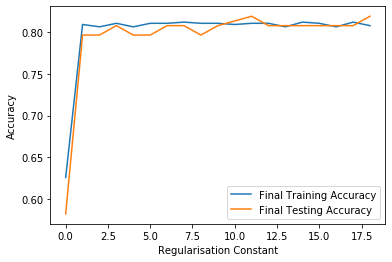

In [18]:
result = train(x_train, y_train, x_test, y_test)
plt.plot(result['train'], label='Final Training Accuracy')
plt.plot(result['test'], label='Final Testing Accuracy')
plt.xlabel('Regularisation Constant')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
# Final model 
top_idx = np.argmax(np.array(result['test']))
top_model = result['models'][top_idx]
print(f'The best model has a testing accuracy of {top_model.score(x_test, y_test)}')

The best model has a testing accuracy of 0.8192090395480226


<h1> Prepare Submission </h1>


In [20]:
# copy test df
submission_df = test_df.copy()

# process data
submission_df = submission_df.drop('Name', 1).drop('Cabin', 1)
submission_df['Sex'] = sex_encoder.transform(submission_df['Sex'].to_numpy())
submission_df['Embarked'] = embarked_encoder.transform(submission_df['Embarked'].to_numpy())
submission_df['Ticket'] = submission_df['Ticket'].apply(lambda x:x.split()[-1][0])
submission_df['Ticket'] = submission_df['Ticket'].apply(lambda x:int(x))

print(submission_df.head())
print(submission_df.info())

   PassengerId  Pclass  Sex   Age  SibSp  Parch   Ticket     Fare  Embarked
0          892       3    1  34.5      0      0   330911   7.8292         1
1          893       3    0  47.0      1      0   363272   7.0000         2
2          894       2    1  62.0      0      0   240276   9.6875         1
3          895       3    1  27.0      0      0   315154   8.6625         2
4          896       3    0  22.0      1      1  3101298  12.2875         2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null int64
dtypes: float64(2), int64(7)
memory usage: 29.5 KB
None


In [21]:
# independent variable
x_sub = submission_df[x_labels].to_numpy()
print(x_sub[:5])

[[3.000000e+00 1.000000e+00 3.450000e+01 0.000000e+00 0.000000e+00
  3.309110e+05 7.829200e+00 1.000000e+00]
 [3.000000e+00 0.000000e+00 4.700000e+01 1.000000e+00 0.000000e+00
  3.632720e+05 7.000000e+00 2.000000e+00]
 [2.000000e+00 1.000000e+00 6.200000e+01 0.000000e+00 0.000000e+00
  2.402760e+05 9.687500e+00 1.000000e+00]
 [3.000000e+00 1.000000e+00 2.700000e+01 0.000000e+00 0.000000e+00
  3.151540e+05 8.662500e+00 2.000000e+00]
 [3.000000e+00 0.000000e+00 2.200000e+01 1.000000e+00 1.000000e+00
  3.101298e+06 1.228750e+01 2.000000e+00]]


In [22]:
# standardise independent variable
x_sub = standardiser.transform(x_sub)
x_sub = np.nan_to_num(x_sub, nan=0)
print(x_sub[:5])

[[ 0.82834714  0.73790421  0.33611766 -0.476515   -0.47563846  0.04888848
  -0.49085583 -0.67271149]
 [ 0.82834714 -1.35518946  1.19837502  0.42845448 -0.47563846  0.09807479
  -0.50752831  0.58862255]
 [-0.36950779  0.73790421  2.23308385 -0.476515   -0.47563846 -0.08886995
  -0.45349155 -0.67271149]
 [ 0.82834714  0.73790421 -0.18123675 -0.476515   -0.47563846  0.02493902
  -0.47410092  0.58862255]
 [ 0.82834714 -1.35518946 -0.5261397   0.42845448  0.76242048  4.25966989
  -0.40121413  0.58862255]]


In [0]:
# prediction
predictions = top_model.predict(x_sub)

In [24]:
# final submission
final_submission_df = pd.DataFrame()
final_submission_df['PassengerId'] = submission_df['PassengerId']
final_submission_df['Survived'] = predictions
final_submission_df = final_submission_df.set_index('PassengerId', drop=True)
print(final_submission_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 1 columns):
Survived    418 non-null int64
dtypes: int64(1)
memory usage: 6.5 KB
None


In [0]:
# convert to csv
path = './titanic_prediction.csv'
final_submission_df.to_csv(path)